<a href="https://colab.research.google.com/github/muiruric/GDP_prediction/blob/main/GDP_Prediction_Using_Open_Street_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip3 install geopandas


In [ ]:
!apt-get install gdal-bin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-gdal python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,968 kB of archives.
After this operation, 24.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.4.3+dfsg-1~jammy0 [967 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.4.3+dfsg-1~jammy0 [534 kB]
Fetched 4,968 kB in 0s (16.9 MB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 120874 files and director

In [ ]:
!pip install geopandas

In [ ]:
import requests
import sqlite3
import geopandas as gpd
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt



In [ ]:
!ogr2ogr --version

GDAL 3.4.3, released 2022/04/22


In [ ]:
!ogr2ogr -f SQLite -lco FORMAT=WKT sa_2017.sqlite /content/drive/MyDrive/OSM/south-africa-170101.osm.pbf

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!ogr2ogr -f SQLite -lco FORMAT=WKT sa_2018.sqlite /content/drive/MyDrive/OSM/south-africa-180101.osm.pbf

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!ogr2ogr -f SQLite -lco FORMAT=WKT sa_2019.sqlite /content/drive/MyDrive/OSM/south-africa-190101.osm.pbf

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!ogr2ogr -f SQLite -lco FORMAT=WKT sa_2020.sqlite /content/drive/MyDrive/OSM/south-africa-200101.osm.pbf

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!ogr2ogr -f SQLite -lco FORMAT=WKT sa_2021.sqlite /content/drive/MyDrive/OSM/south-africa-210101.osm.pbf

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!ogr2ogr -f SQLite -lco FORMAT=WKT sa_2022.sqlite /content/drive/MyDrive/OSM/south-africa-220101.osm.pbf

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!ogr2ogr -f SQLite -lco FORMAT=WKT sa_2023.sqlite /content/drive/MyDrive/OSM/south-africa-230101.osm.pbf

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
DATA = "./sa_2017.sqlite"
con = sqlite3.connect(DATA)
cursor = con.cursor()

In [ ]:
#reading the columns present in the osm.pbf file for 2017
query = """
SELECT name
FROM sqlite_master
WHERE type = 'table' AND name NOT LIKE 'sqlite_%';
"""
tables = cursor.execute(query)
tables.fetchall()

[('geometry_columns',),
 ('spatial_ref_sys',),
 ('points',),
 ('lines',),
 ('multilinestrings',),
 ('multipolygons',),
 ('other_relations',)]

In [ ]:
#loading data into pandas from the SQL
#geometry contains metadata about geometry
geometry_columns = pd.read_sql("SELECT * FROM geometry_columns;",con)
geometry_columns.head()

f_table_name f_geometry_column  geometry_type  coord_dimension  srid  \
0            points      WKT_GEOMETRY              1                2  4326   
1             lines      WKT_GEOMETRY              2                2  4326   
2  multilinestrings      WKT_GEOMETRY              5                2  4326   
3     multipolygons      WKT_GEOMETRY              6                2  4326   
4   other_relations      WKT_GEOMETRY              7                2  4326   

  geometry_format  
0             WKT  
1             WKT  
2             WKT  
3             WKT  
4             WKT

In [ ]:
#loading data into pandas from the SQL
spatial_ref_sys = pd.read_sql("SELECT * FROM spatial_ref_sys;",con)
spatial_ref_sys.head()

srid auth_name auth_srid                                             srtext
0  4326      EPSG      4326  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS...

In [ ]:
#loading points into df
points = pd.read_sql("SELECT * FROM points;",con)
points.head()

ogc_fid                    WKT_GEOMETRY    osm_id  name barrier  \
0        1  POINT (18.8587291 -33.9322555)  18401303  None    None   
1        2   POINT (18.868021 -33.9365279)  18402028  None    None   
2        3  POINT (18.8628508 -33.9369089)  18402032  None    None   
3        4  POINT (18.8595652 -33.9389158)  18402037  None    None   
4        5  POINT (18.8518332 -33.9403542)  18402040  None    None   

           highway   ref address is_in place man_made  \
0  traffic_signals  None    None  None  None     None   
1             stop  None    None  None  None     None   
2  mini_roundabout  None    None  None  None     None   
3  mini_roundabout  None    None  None  None     None   
4  traffic_signals  None    None  None  None     None   

                      other_tags  
0                           None  
1                           None  
2       "direction"=>"clockwise"  
3       "direction"=>"clockwise"  
4  "crossing"=>"traffic_signals"

In [ ]:
#loading points into df
lines = pd.read_sql("SELECT * FROM lines;",con)
lines.head()

ogc_fid                                       WKT_GEOMETRY   osm_id  \
0        1  LINESTRING (25.5575495 -33.9511095,25.5606572 ...  3715718   
1        2  LINESTRING (25.5759438 -33.9485949,25.5761168 ...  3715888   
2        3  LINESTRING (25.5577951 -33.9502452,25.5595087 ...  3823543   
3        4  LINESTRING (25.5568513 -33.9534452,25.5567884 ...  3823545   
4        5  LINESTRING (25.5596765 -33.9541297,25.5597392 ...  3823547   

            name      highway waterway aerialway barrier man_made  z_order  \
0   Lucas Street  residential     None      None    None     None        3   
1      Ring Road  residential     None      None    None     None        3   
2  Hudson Street  residential     None      None    None     None        3   
3     6th Avenue  residential     None      None    None     None        3   
4     5th Avenue  residential     None      None    None     None        3   

                                          other_tags  
0                             "is_in"=>"Newton Park"  
1  "oneway"=>"yes","source:name"=>"local knowledg...  
2                             "is_in"=>"Newton Park"  
3                             "is_in"=>"Newton Park"  
4                             "is_in"=>"Newton Park"

In [ ]:
from shapely.creation import multilinestrings
#loading points into df
multilinestrings = pd.read_sql("SELECT * FROM multilinestrings;",con)
multilinestrings.head()

ogc_fid                                       WKT_GEOMETRY  osm_id  \
0        1  MULTILINESTRING ((28.7844617 -31.5945561,28.78...   87234   
1        2  MULTILINESTRING ((29.9946184 -23.8450715,29.99...  123311   
2        3  MULTILINESTRING ((30.5056492 -29.7282174,30.50...  166154   
3        4  MULTILINESTRING ((30.3704012 -29.6363544,30.37...  167494   
4        5  MULTILINESTRING ((30.2539704 -25.7019728,30.25...  193038   

                                 name   type  \
0                     Amabele–Mthatha  route   
1  Magoebaskloof Hiking Trail route 4  route   
2              Umlaas Road–Mid Illovo  route   
3           Pietermaritzburg–Richmond  route   
4                 Machadodorp–Breyten  route   

                                      other_tags  
0                             "route"=>"railway"  
1  "ref"=>"4","route"=>"hiking","network"=>"lwn"  
2                             "route"=>"railway"  
3                             "route"=>"railway"  
4                             "route"=>"railway"

In [ ]:
#loading points into df
multipolygons = pd.read_sql("SELECT * FROM multipolygons;",con)
multipolygons.head()

ogc_fid                                       WKT_GEOMETRY osm_id  \
0        1  MULTIPOLYGON (((18.4897 -33.882015,18.4897601 ...   8990   
1        2  MULTIPOLYGON (((18.4665793 -33.9546349,18.4667...  15530   
2        3  MULTIPOLYGON (((18.4694133 -33.9543388,18.4692...  15536   
3        4  MULTIPOLYGON (((18.465629 -33.9579014,18.46566...  15538   
4        5  MULTIPOLYGON (((18.4704732 -33.9549456,18.4703...  15539   

  osm_way_id               name          type aeroway amenity admin_level  \
0       None   Milnerton Lagoon  multipolygon    None    None        None   
1       None             Kopano  multipolygon    None    None        None   
2       None        Baxter Hall  multipolygon    None    None        None   
3       None   All Africa House  multipolygon    None    None        None   
4       None  Graça Machel Hall  multipolygon    None    None        None   

  barrier  ... leisure man_made military natural office place  shop sport  \
0    None  ...    None     None     None   water   None  None  None  None   
1    None  ...    None     None     None    None   None  None  None  None   
2    None  ...    None     None     None    None   None  None  None  None   
3    None  ...    None     None     None    None   None  None  None  None   
4    None  ...    None     None     None    None   None  None  None  None   

  tourism other_tags  
0    None       None  
1    None       None  
2    None       None  
3    None       None  
4    None       None  

[5 rows x 27 columns]

In [ ]:
multipolygons.columns

Index(['ogc_fid', 'WKT_GEOMETRY', 'osm_id', 'osm_way_id', 'name', 'type',
       'aeroway', 'amenity', 'admin_level', 'barrier', 'boundary', 'building',
       'craft', 'geological', 'historic', 'land_area', 'landuse', 'leisure',
       'man_made', 'military', 'natural', 'office', 'place', 'shop', 'sport',
       'tourism', 'other_tags'],
      dtype='object')

In [ ]:
#loading points into df
other_relations= pd.read_sql("SELECT * FROM other_relations;",con)
other_relations.head()

ogc_fid                                       WKT_GEOMETRY osm_id  \
0        1  GEOMETRYCOLLECTION (LINESTRING (18.4682943 -33...   3537   
1        2  GEOMETRYCOLLECTION (LINESTRING (18.4646554 -33...   3540   
2        3  GEOMETRYCOLLECTION (LINESTRING (18.4647565 -33...   3543   
3        4  GEOMETRYCOLLECTION (LINESTRING (18.4463592 -34...   3552   
4        5  GEOMETRYCOLLECTION (LINESTRING (18.4581587 -33...   3554   

          name      type                                         other_tags  
0         None    bridge                                               None  
1  Observatory  junction  "ref"=>"6","junction"=>"link","grade_separated...  
2     Rosebank  junction  "ref"=>"7","junction"=>"link","grade_separated...  
3         None    bridge                                               None  
4   Rondebosch  junction  "grade_separated"=>"yes","junction"=>"link","r...

In [ ]:
from shapely import wkt

In [ ]:
#to fetch data from the SQL tables
#each has a different geom_type
# add new column table name to indicate source
#concatenate to one table
complete_df = pd.DataFrame()
for geom_type in ['lines', 'points', 'multilinestrings', 'multipolygons', 'other_relations']:
  df = pd.read_sql(f"SELECT *, '{geom_type}' AS table_name FROM {geom_type};", con)
  complete_df = pd.concat([complete_df, df], ignore_index=True)

In [ ]:
complete_df

ogc_fid                                       WKT_GEOMETRY   osm_id  \
0              1  LINESTRING (25.5575495 -33.9511095,25.5606572 ...  3715718   
1              2  LINESTRING (25.5759438 -33.9485949,25.5761168 ...  3715888   
2              3  LINESTRING (25.5577951 -33.9502452,25.5595087 ...  3823543   
3              4  LINESTRING (25.5568513 -33.9534452,25.5567884 ...  3823545   
4              5  LINESTRING (25.5596765 -33.9541297,25.5597392 ...  3823547   
...          ...                                                ...      ...   
1288044     6001  GEOMETRYCOLLECTION (LINESTRING (30.499611 -29....  6813367   
1288045     6002  GEOMETRYCOLLECTION (LINESTRING (30.4995768 -29...  6813368   
1288046     6003  GEOMETRYCOLLECTION (LINESTRING (30.4990703 -29...  6813369   
1288047     6004  GEOMETRYCOLLECTION (LINESTRING (30.4998112 -29...  6813370   
1288048     6005  GEOMETRYCOLLECTION (POINT (20.0583872 -32.4067...  6839197   

                  name      highway waterway aerialway barrier man_made  \
0         Lucas Street  residential     None      None    None     None   
1            Ring Road  residential     None      None    None     None   
2        Hudson Street  residential     None      None    None     None   
3           6th Avenue  residential     None      None    None     None   
4           5th Avenue  residential     None      None    None     None   
...                ...          ...      ...       ...     ...      ...   
1288044           None          NaN      NaN       NaN     NaN      NaN   
1288045           None          NaN      NaN       NaN     NaN      NaN   
1288046           None          NaN      NaN       NaN     NaN      NaN   
1288047           None          NaN      NaN       NaN     NaN      NaN   
1288048           None          NaN      NaN       NaN     NaN      NaN   

         z_order  ... historic land_area landuse leisure military natural  \
0            3.0  ...      NaN       NaN     NaN     NaN      NaN     NaN   
1            3.0  ...      NaN       NaN     NaN     NaN      NaN     NaN   
2            3.0  ...      NaN       NaN     NaN     NaN      NaN     NaN   
3            3.0  ...      NaN       NaN     NaN     NaN      NaN     NaN   
4            3.0  ...      NaN       NaN     NaN     NaN      NaN     NaN   
...          ...  ...      ...       ...     ...     ...      ...     ...   
1288044      NaN  ...      NaN       NaN     NaN     NaN      NaN     NaN   
1288045      NaN  ...      NaN       NaN     NaN     NaN      NaN     NaN   
1288046      NaN  ...      NaN       NaN     NaN     NaN      NaN     NaN   
1288047      NaN  ...      NaN       NaN     NaN     NaN      NaN     NaN   
1288048      NaN  ...      NaN       NaN     NaN     NaN      NaN     NaN   

        office shop sport tourism  
0          NaN  NaN   NaN     NaN  
1          NaN  NaN   NaN     NaN  
2          NaN  NaN   NaN     NaN  
3          NaN  NaN   NaN     NaN  
4          NaN  NaN   NaN     NaN  
...        ...  ...   ...     ...  
1288044    NaN  NaN   NaN     NaN  
1288045    NaN  NaN   NaN     NaN  
1288046    NaN  NaN   NaN     NaN  
1288047    NaN  NaN   NaN     NaN  
1288048    NaN  NaN   NaN     NaN  

[1288049 rows x 35 columns]

In [ ]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288049 entries, 0 to 1288048
Data columns (total 35 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ogc_fid       1288049 non-null  int64  
 1   WKT_GEOMETRY  1288049 non-null  object 
 2   osm_id        953309 non-null   object 
 3   name          242149 non-null   object 
 4   highway       552216 non-null   object 
 5   waterway      30020 non-null    object 
 6   aerialway     4 non-null        object 
 7   barrier       25477 non-null    object 
 8   man_made      5045 non-null     object 
 9   z_order       615971 non-null   float64
 10  other_tags    575357 non-null   object 
 11  table_name    1288049 non-null  object 
 12  ref           1812 non-null     object 
 13  address       0 non-null        object 
 14  is_in         7234 non-null     object 
 15  place         8883 non-null     object 
 16  type          14956 non-null    object 
 17  osm_way_id    334740 non-nu

In [ ]:
complete_df.to_csv('osm_data_2017.csv', index=False)


In [ ]:
complete_df['amenity'].unique()

array([nan, None, 'parking', 'public_building', 'school', 'library',
       'hospital', 'place_of_worship', 'university', 'college', 'police',
       'nursing_home', 'toilets', 'fuel', 'restaurant', 'waste_disposal',
       'clinic', 'townhall', 'marketplace', 'courthouse', 'post_office',
       'bus_station', 'swimming_pool', 'prison', 'theatre', 'shower',
       'grave_yard', 'residential_home', 'Scout Troop', 'bank',
       'waste_transfer_station', 'minibus_taxi_rank', 'kindergarten',
       'fire_station', 'retail', 'fast_food', 'embassy', 'bottle_store',
       'pharmacy', 'taxi', 'biergarten', 'social_facility', 'nightclub',
       'gym', 'recycling', 'childrens_home', 'casino', 'car_rental',
       'property_agent', 'cafe', 'pub', 'arts_centre', 'parking_space',
       'orphanage', 'club', 'fountain', 'Autoglass repair', 'doctors',
       'fish_hatchery', 'shelter', 'building', 'shop', 'cinema',
       'community_centre', 'atm', 'car_wash', 'veterinary',
       'loading_area', 

In [ ]:
complete_df['building'].unique()

array([nan, None, 'dormitory', 'university', 'castle', 'fort', 'yes',
       'school', 'hostel', 'flats', 'stadium', 'roof', 'residential',
       'apartments', 'office', 'hospital', 'college', 'industrial',
       'commercial', 'retail', 'hotel', 'house', 'church',
       'cooling_tower', 'roof;school;yes', 'retail;yes', 'yes;commercial',
       'train_station', 'public', 'shed', 'mall', 'warehouse',
       'shopping_centre', 'shop', 'no', 'factory', 'shopping_complex',
       'tower', 'gym', 'fire_station', 'clubhouse', 'post_office',
       'telephone_exchange', 'library', 'workshop', 'parking',
       'city_hall', 'ruins', 'shadenetting', 'flat', 'garage', 'museum',
       '*', 'cell_phone_something', 'hangar', 'apartment', 'barn',
       'farmhouse', 'department_store', 'stable', 'disused_power_plant',
       'station', 'hut', 'weapon_armory', 'university_residence', 'hall',
       'collapsed', 'construction', 'mosque', 'supermarket', 'service',
       'greenhouse', 'bunker', 'far

In [ ]:
complete_df['tourism'].unique()

array([nan, None, 'hotel', 'viewpoint', 'guest_house', 'attraction',
       'hostel', 'gallery', 'caravan_site', 'information', 'picnic_site',
       'museum', 'chalet', 'camp_site', 'resort', 'wine_cellar',
       'theme_park', 'zoo', 'alpine_hut', 'yes', 'motel', 'artwork',
       'picnic_area', 'sign', 'wilderness_hut', 'lodge', 'ground_sign',
       'house', 'Reception', 'apartment'], dtype=object)

In [ ]:
#converting the dataframe to a geodataframe
complete_df['geom'] = gpd.GeoSeries.from_wkt(complete_df['WKT_GEOMETRY'])
gdf = gpd.GeoDataFrame(complete_df, geometry='geom')
gdf.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1288049 entries, 0 to 1288048
Data columns (total 36 columns):
 #   Column        Non-Null Count    Dtype   
---  ------        --------------    -----   
 0   ogc_fid       1288049 non-null  int64   
 1   WKT_GEOMETRY  1288049 non-null  object  
 2   osm_id        953309 non-null   object  
 3   name          242149 non-null   object  
 4   highway       552216 non-null   object  
 5   waterway      30020 non-null    object  
 6   aerialway     4 non-null        object  
 7   barrier       25477 non-null    object  
 8   man_made      5045 non-null     object  
 9   z_order       615971 non-null   float64 
 10  other_tags    575357 non-null   object  
 11  table_name    1288049 non-null  object  
 12  ref           1812 non-null     object  
 13  address       0 non-null        object  
 14  is_in         7234 non-null     object  
 15  place         8883 non-null     object  
 16  type          14956 non-null    object  
 17  

In [ ]:
gdf['boundary'].unique()

array([nan, None, 'administrative', 'national_park', 'maritime', 'postal',
       'postal_code', 'protected_area', 'local_authority', 'yes',
       'under construction', 'town', 'Pebble rock Golf & Bush village',
       'survey', 'landuse'], dtype=object)

<Axes: >

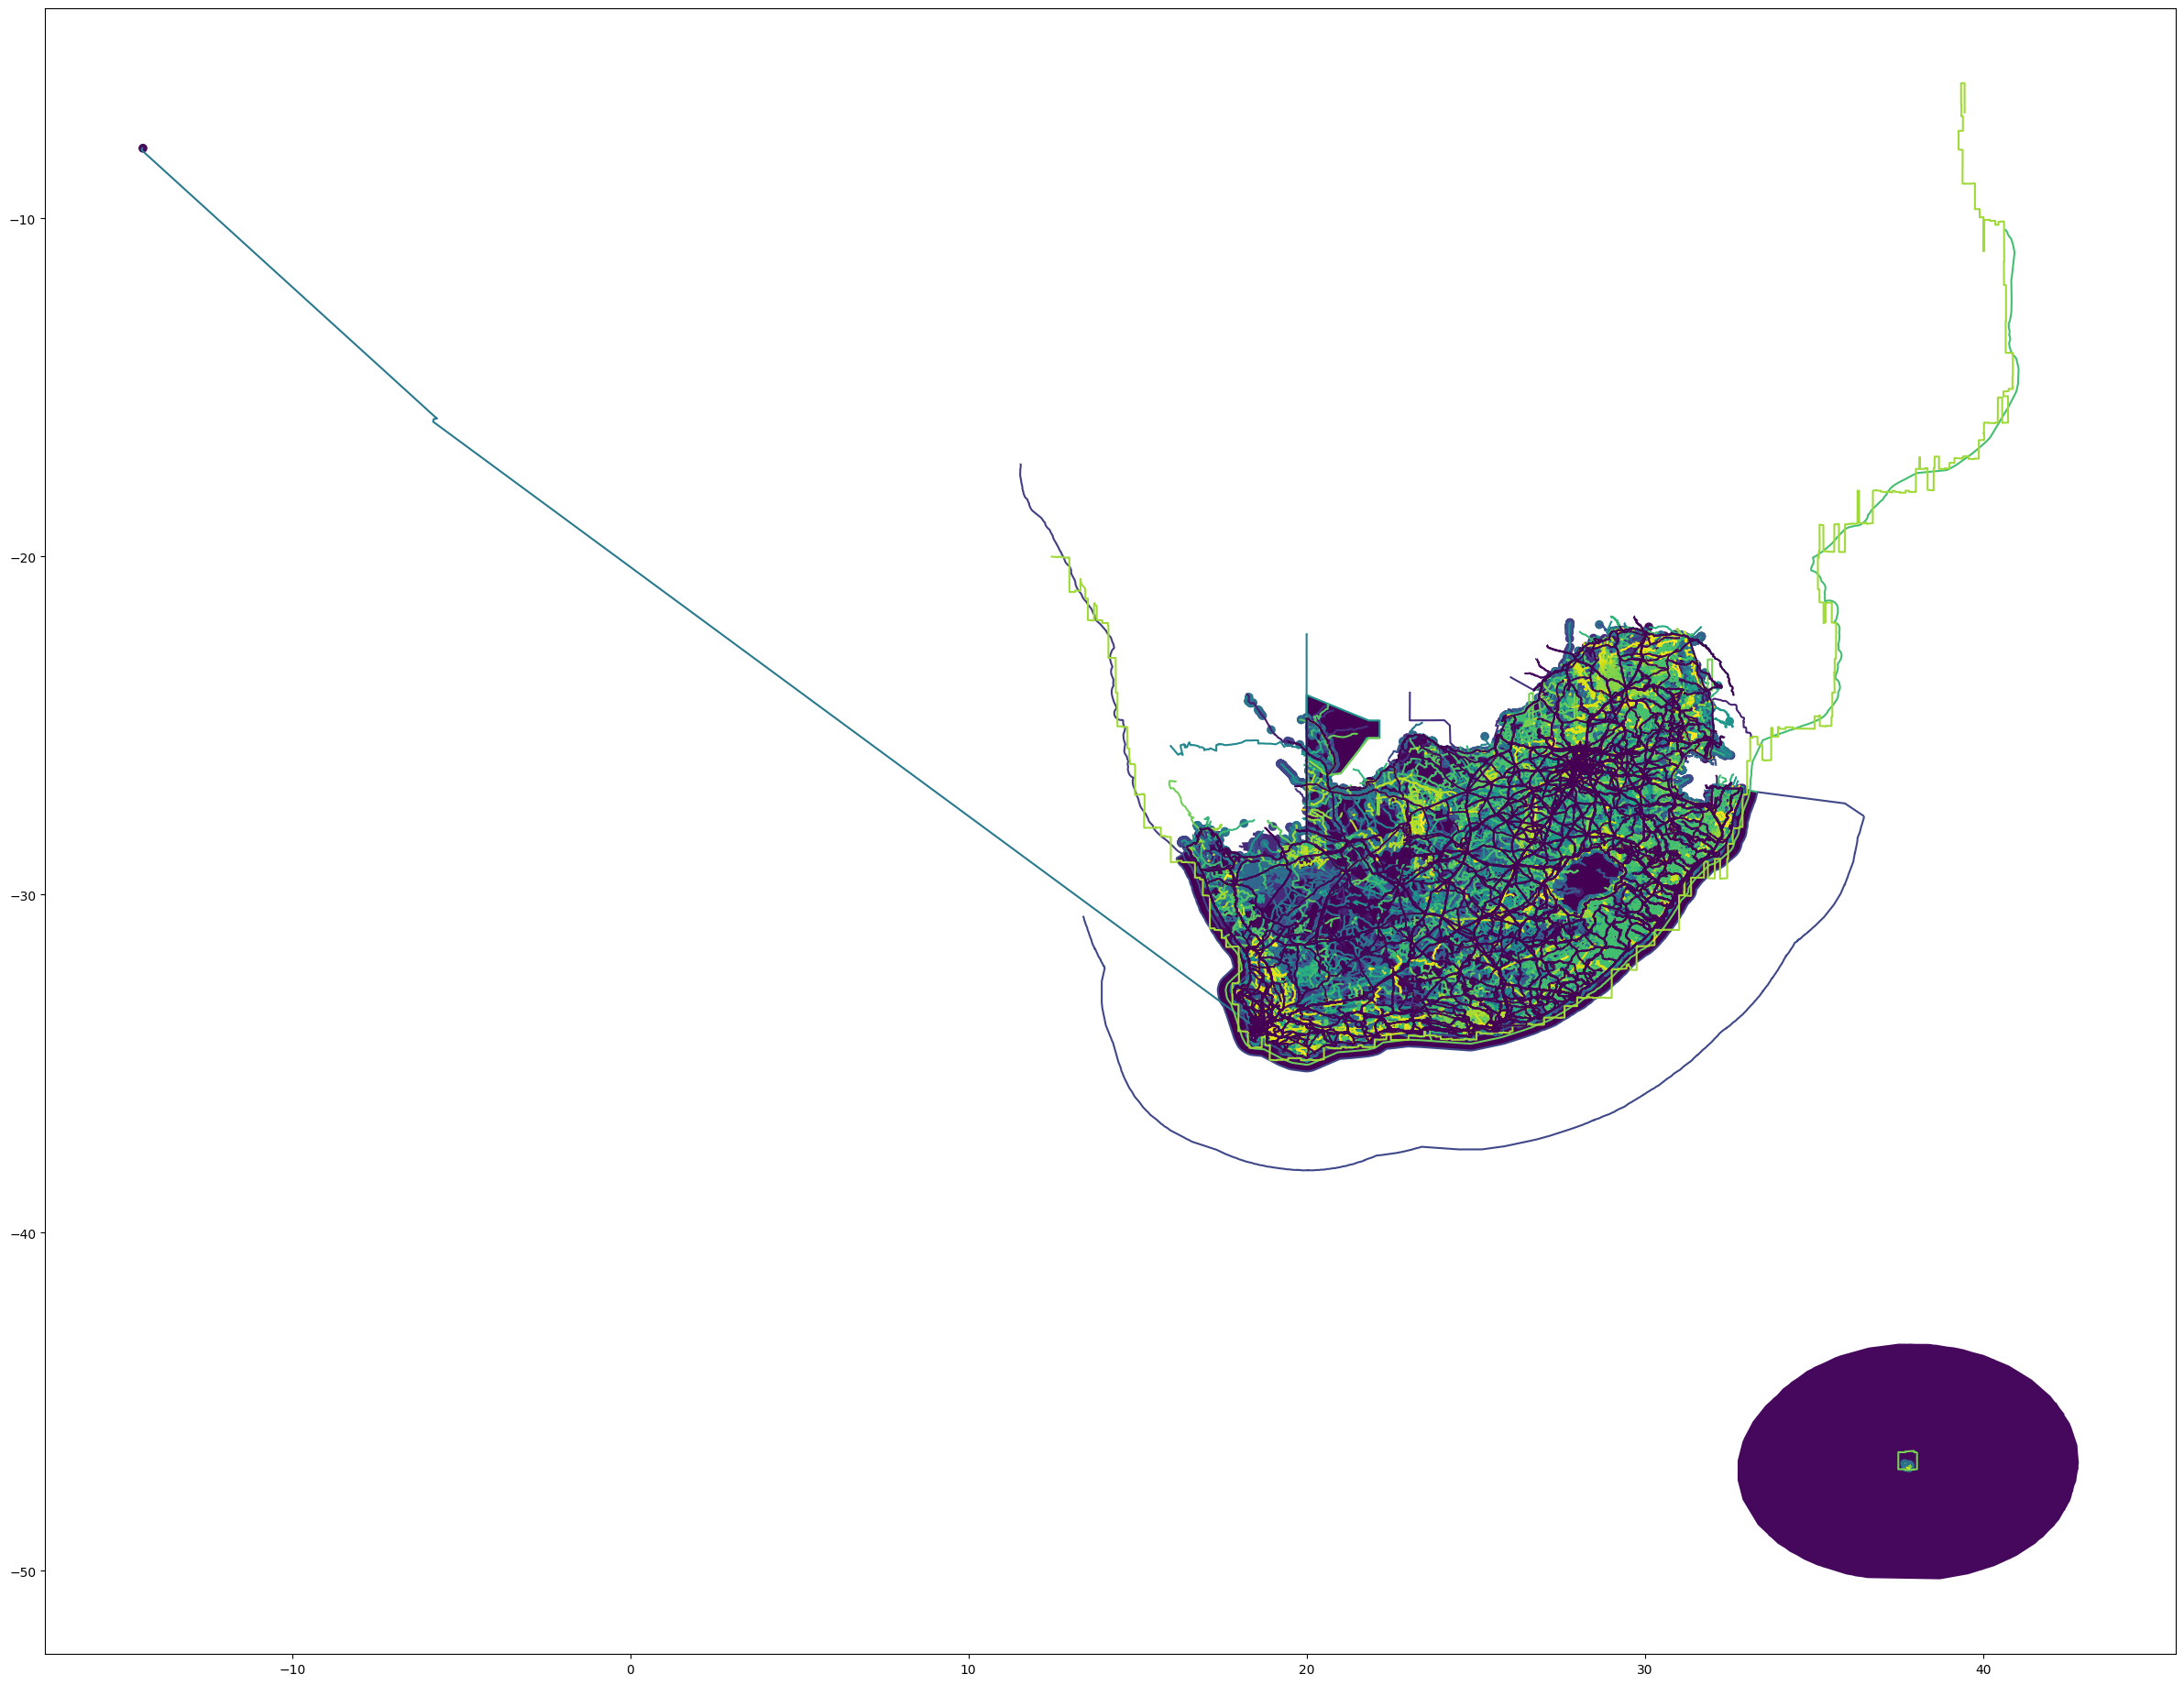

In [ ]:
#plotting all the data
gdf.plot(figsize=(30,25), column = 'ogc_fid')

Unfortunately, Lesotho appears in the OSM for South Africa but indeed, the map is South Africa. From this point, I will experiment with OSM to answer random questions then I will attempt to work with all of the OSMs in the OSM folder

<Axes: >

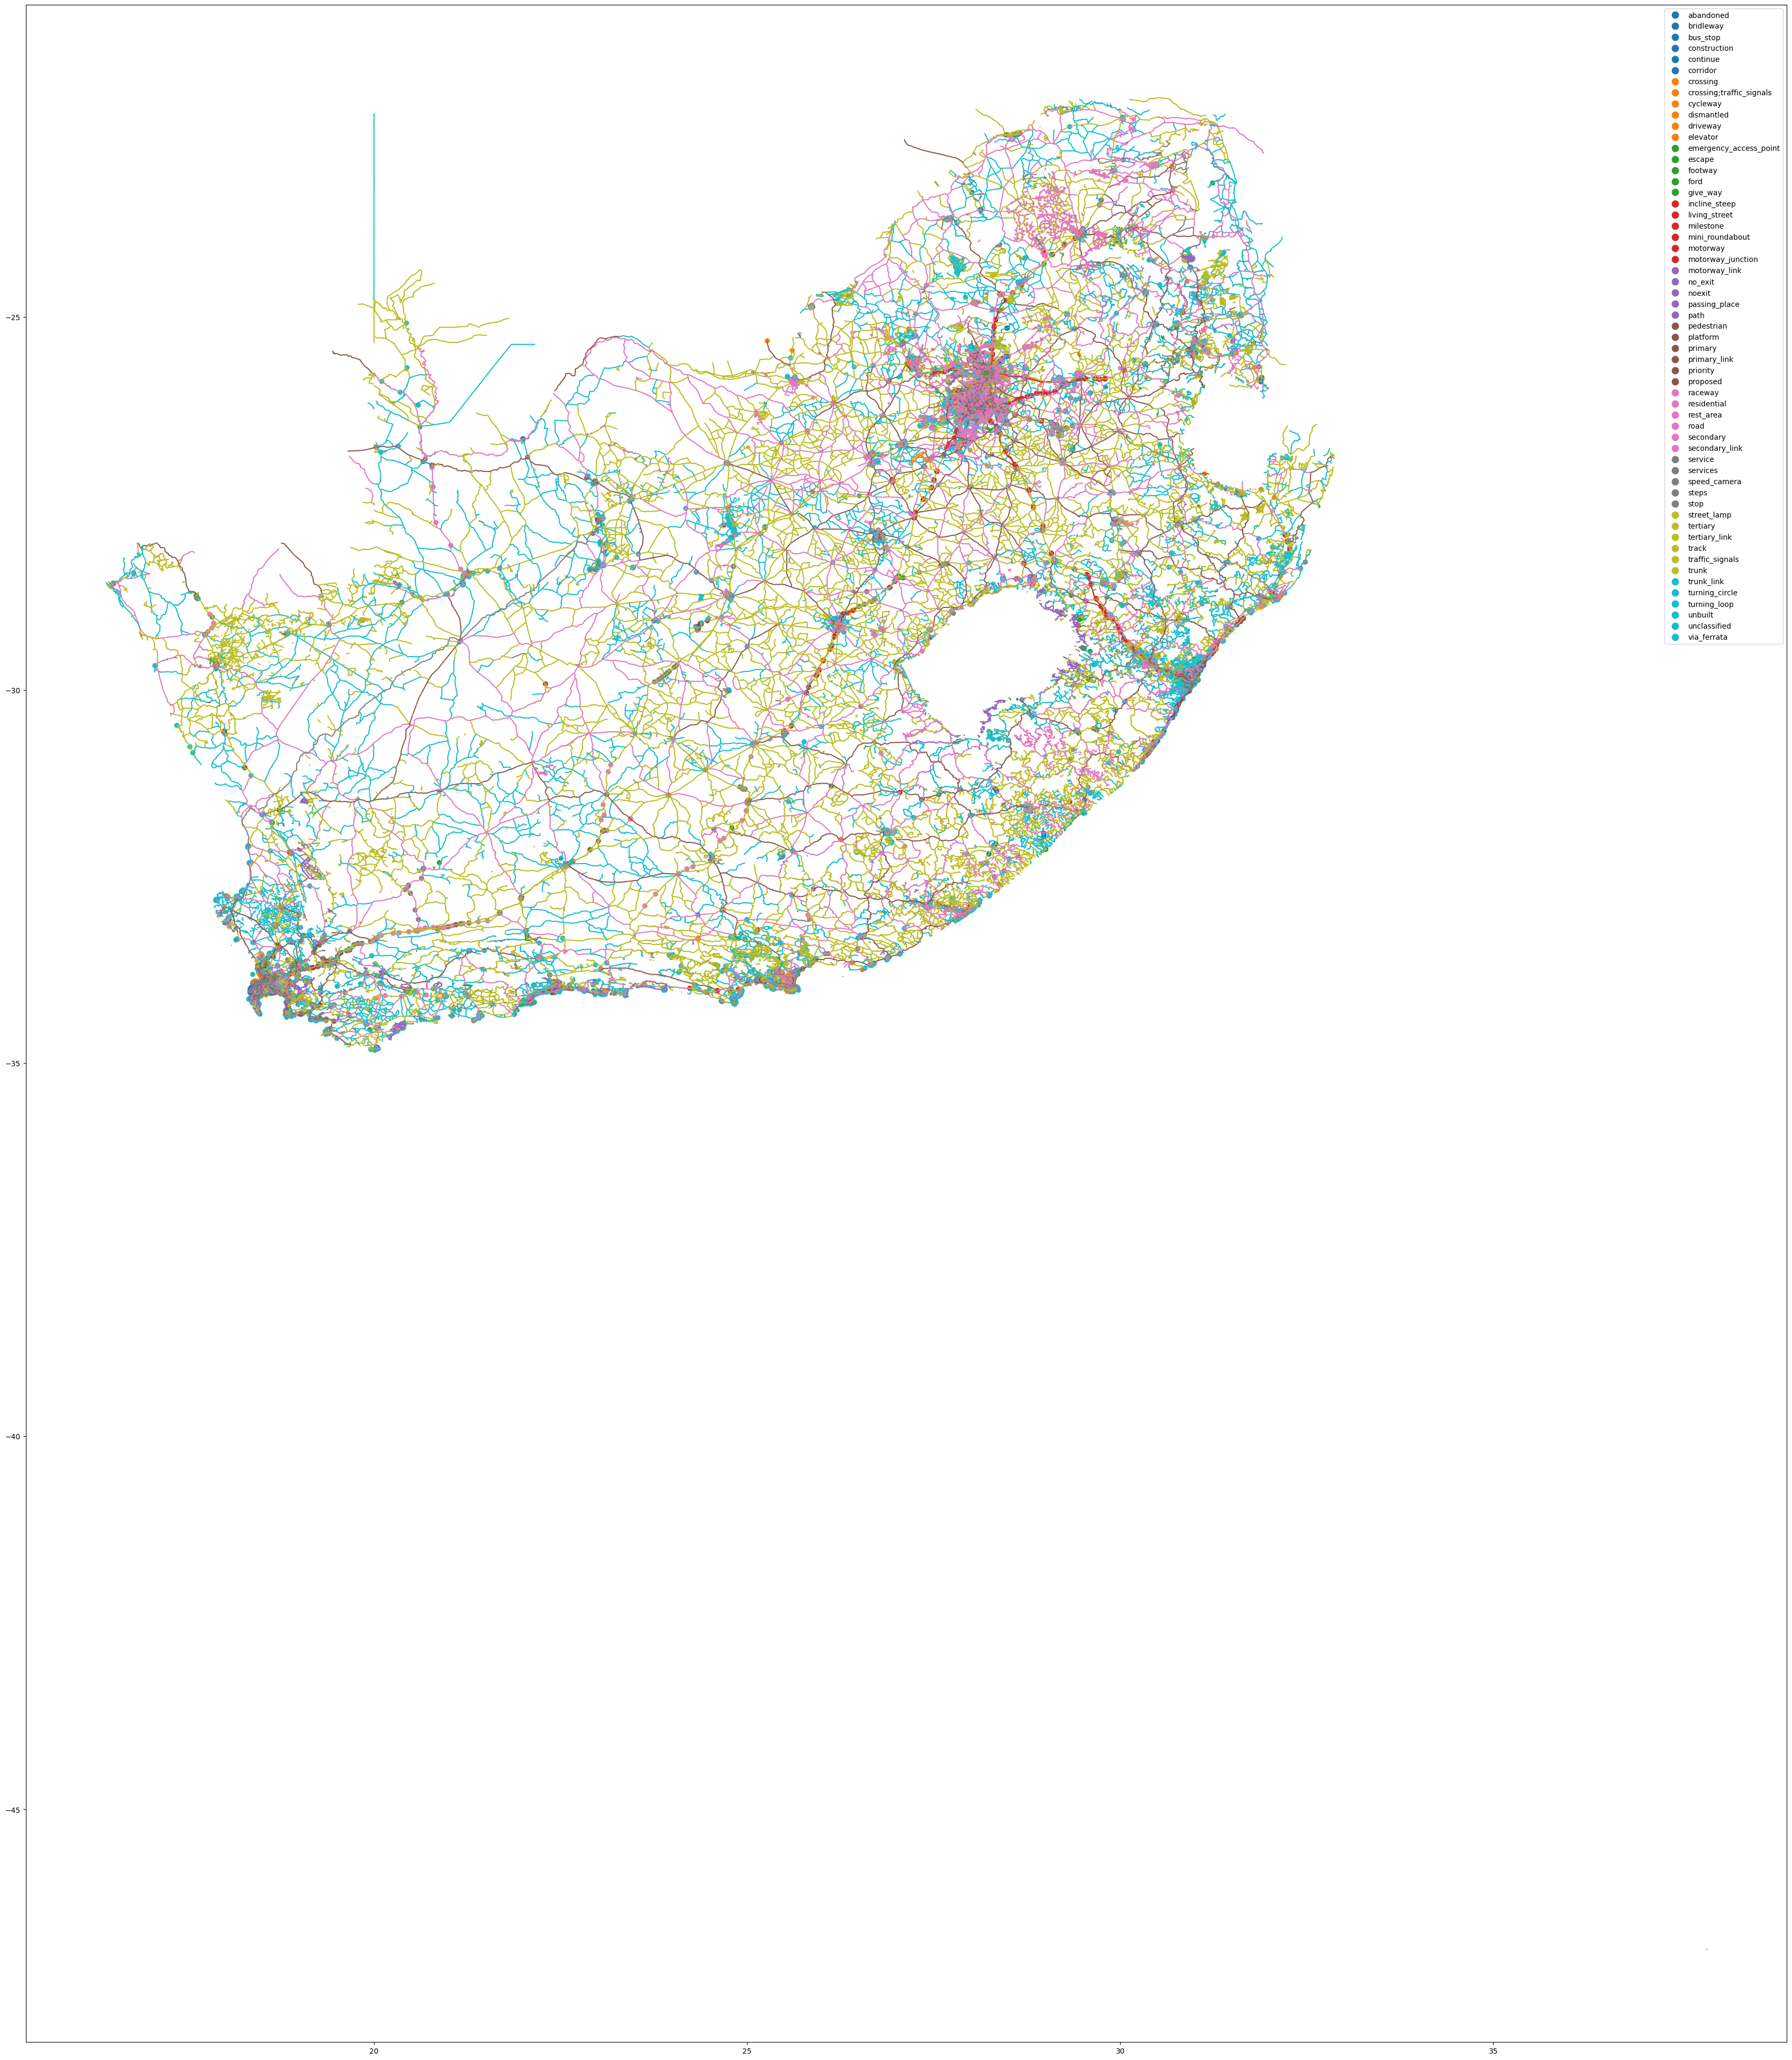

In [ ]:
highway = gdf['highway'].notnull()
gdf[highway].plot(figsize = (50,50), column = 'highway', legend = 'True')

<Axes: >

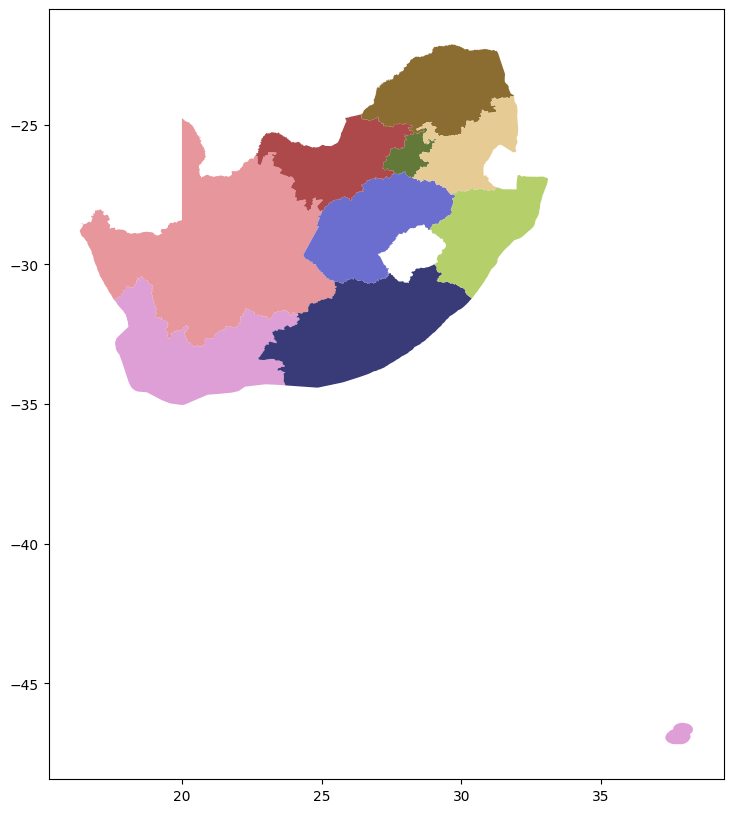

In [ ]:
#filter South African provinces based on 'admin_level'
south_african_provinces = gdf[(gdf['boundary'] == 'administrative') & (gdf['admin_level'] == '4')]
south_african_provinces.plot(figsize=(10, 10), column="name", cmap="tab20b")



In [ ]:
south_african_provinces['name'].unique()

array(['Western Cape', 'Northern Cape', 'Eastern Cape', 'Free State',
       'Gauteng', 'KwaZulu-Natal', 'North West', 'Limpopo', 'Mpumalanga',
       'Oranjemund'], dtype=object)

In [ ]:
south_african_provinces

ogc_fid                                       WKT_GEOMETRY  osm_id  \
939505        57  MULTIPOLYGON (((37.7705748 -47.1735306,37.7472...   80501   
939538        90  MULTIPOLYGON (((18.38138 -30.461379,18.38384 -...   86720   
939585       137  MULTIPOLYGON (((23.6479198 -33.9801498,23.6476...   88574   
939586       138  MULTIPOLYGON (((27.716306 -26.761677,27.71706 ...   92417   
939610       162  MULTIPOLYGON (((27.97076 -25.36295,27.96847 -2...  349344   
939611       163  MULTIPOLYGON (((32.8592149 -26.8637049,32.8594...  349390   
939612       164  MULTIPOLYGON (((26.1862547 -24.6873346,26.1875...  349519   
939613       165  MULTIPOLYGON (((31.0569 -22.33908,31.05947 -22...  349547   
939614       166  MULTIPOLYGON (((28.83844 -26.34075,28.84209 -2...  349556   
1002999    63551  MULTIPOLYGON (((16.4260218 -28.5395201,16.4104...    None   

                  name highway waterway aerialway barrier man_made  z_order  \
939505    Western Cape     NaN      NaN       NaN    None     None      NaN   
939538   Northern Cape     NaN      NaN       NaN    None     None      NaN   
939585    Eastern Cape     NaN      NaN       NaN    None     None      NaN   
939586      Free State     NaN      NaN       NaN    None     None      NaN   
939610         Gauteng     NaN      NaN       NaN    None     None      NaN   
939611   KwaZulu-Natal     NaN      NaN       NaN    None     None      NaN   
939612      North West     NaN      NaN       NaN    None     None      NaN   
939613         Limpopo     NaN      NaN       NaN    None     None      NaN   
939614      Mpumalanga     NaN      NaN       NaN    None     None      NaN   
1002999     Oranjemund     NaN      NaN       NaN    None     None      NaN   

         ...       land_area landuse leisure military natural office  shop  \
939505   ...            None    None    None     None    None   None  None   
939538   ...            None    None    None     None    None   None  None   
939585   ...            None    None    None     None    None   None  None   
939586   ...  administrative    None    None     None    None   None  None   
939610   ...            None    None    None     None    None   None  None   
939611   ...            None    None    None     None    None   None  None   
939612   ...            None    None    None     None    None   None  None   
939613   ...            None    None    None     None    None   None  None   
939614   ...            None    None    None     None    None   None  None   
1002999  ...            None    None    None     None    None   None  None   

        sport tourism                                               geom  
939505   None    None  MULTIPOLYGON (((37.77057 -47.17353, 37.74725 -...  
939538   None    None  MULTIPOLYGON (((18.38138 -30.46138, 18.38384 -...  
939585   None    None  MULTIPOLYGON (((23.64792 -33.98015, 23.64767 -...  
939586   None    None  MULTIPOLYGON (((27.71631 -26.76168, 27.71706 -...  
939610   None    None  MULTIPOLYGON (((27.97076 -25.36295, 27.96847 -...  
939611   None    None  MULTIPOLYGON (((32.85921 -26.86370, 32.85943 -...  
939612   None    None  MULTIPOLYGON (((26.18625 -24.68733, 26.18750 -...  
939613   None    None  MULTIPOLYGON (((31.05690 -22.33908, 31.05947 -...  
939614   None    None  MULTIPOLYGON (((28.83844 -26.34075, 28.84209 -...  
1002999  None    None  MULTIPOLYGON (((16.42602 -28.53952, 16.41042 -...  

[10 rows x 36 columns]

In [ ]:
#Contextily for basemap plotting
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip3 install contextily==1.0rc2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (8.2.1-1).
libproj-dev set to manually installed.
proj-data is already the newest version (8.2.1-1).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 154 kB of archives.
After this operation, 492 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 proj-bin amd64 8.2.1-1 [154 kB]
Fetched 154 kB in 0s (1,640 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 121968 files and directories currently installed.)
Preparing to unpack .../proj-bin_8.2.1-1_amd64.deb ...
Unpacking proj-bin (8.2.1-1) ...
Setting up proj-bin (8.2.1-1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state informat

In [ ]:
unique_admin_levels = gdf['admin_level'].unique()
# in order to get an estimate of the administration levels present
admin_level_counts = gdf['admin_level'].value_counts()
print(admin_level_counts)

10    4289
8      228
6       57
4       10
2        2
5        1
Name: admin_level, dtype: int64


<Axes: >

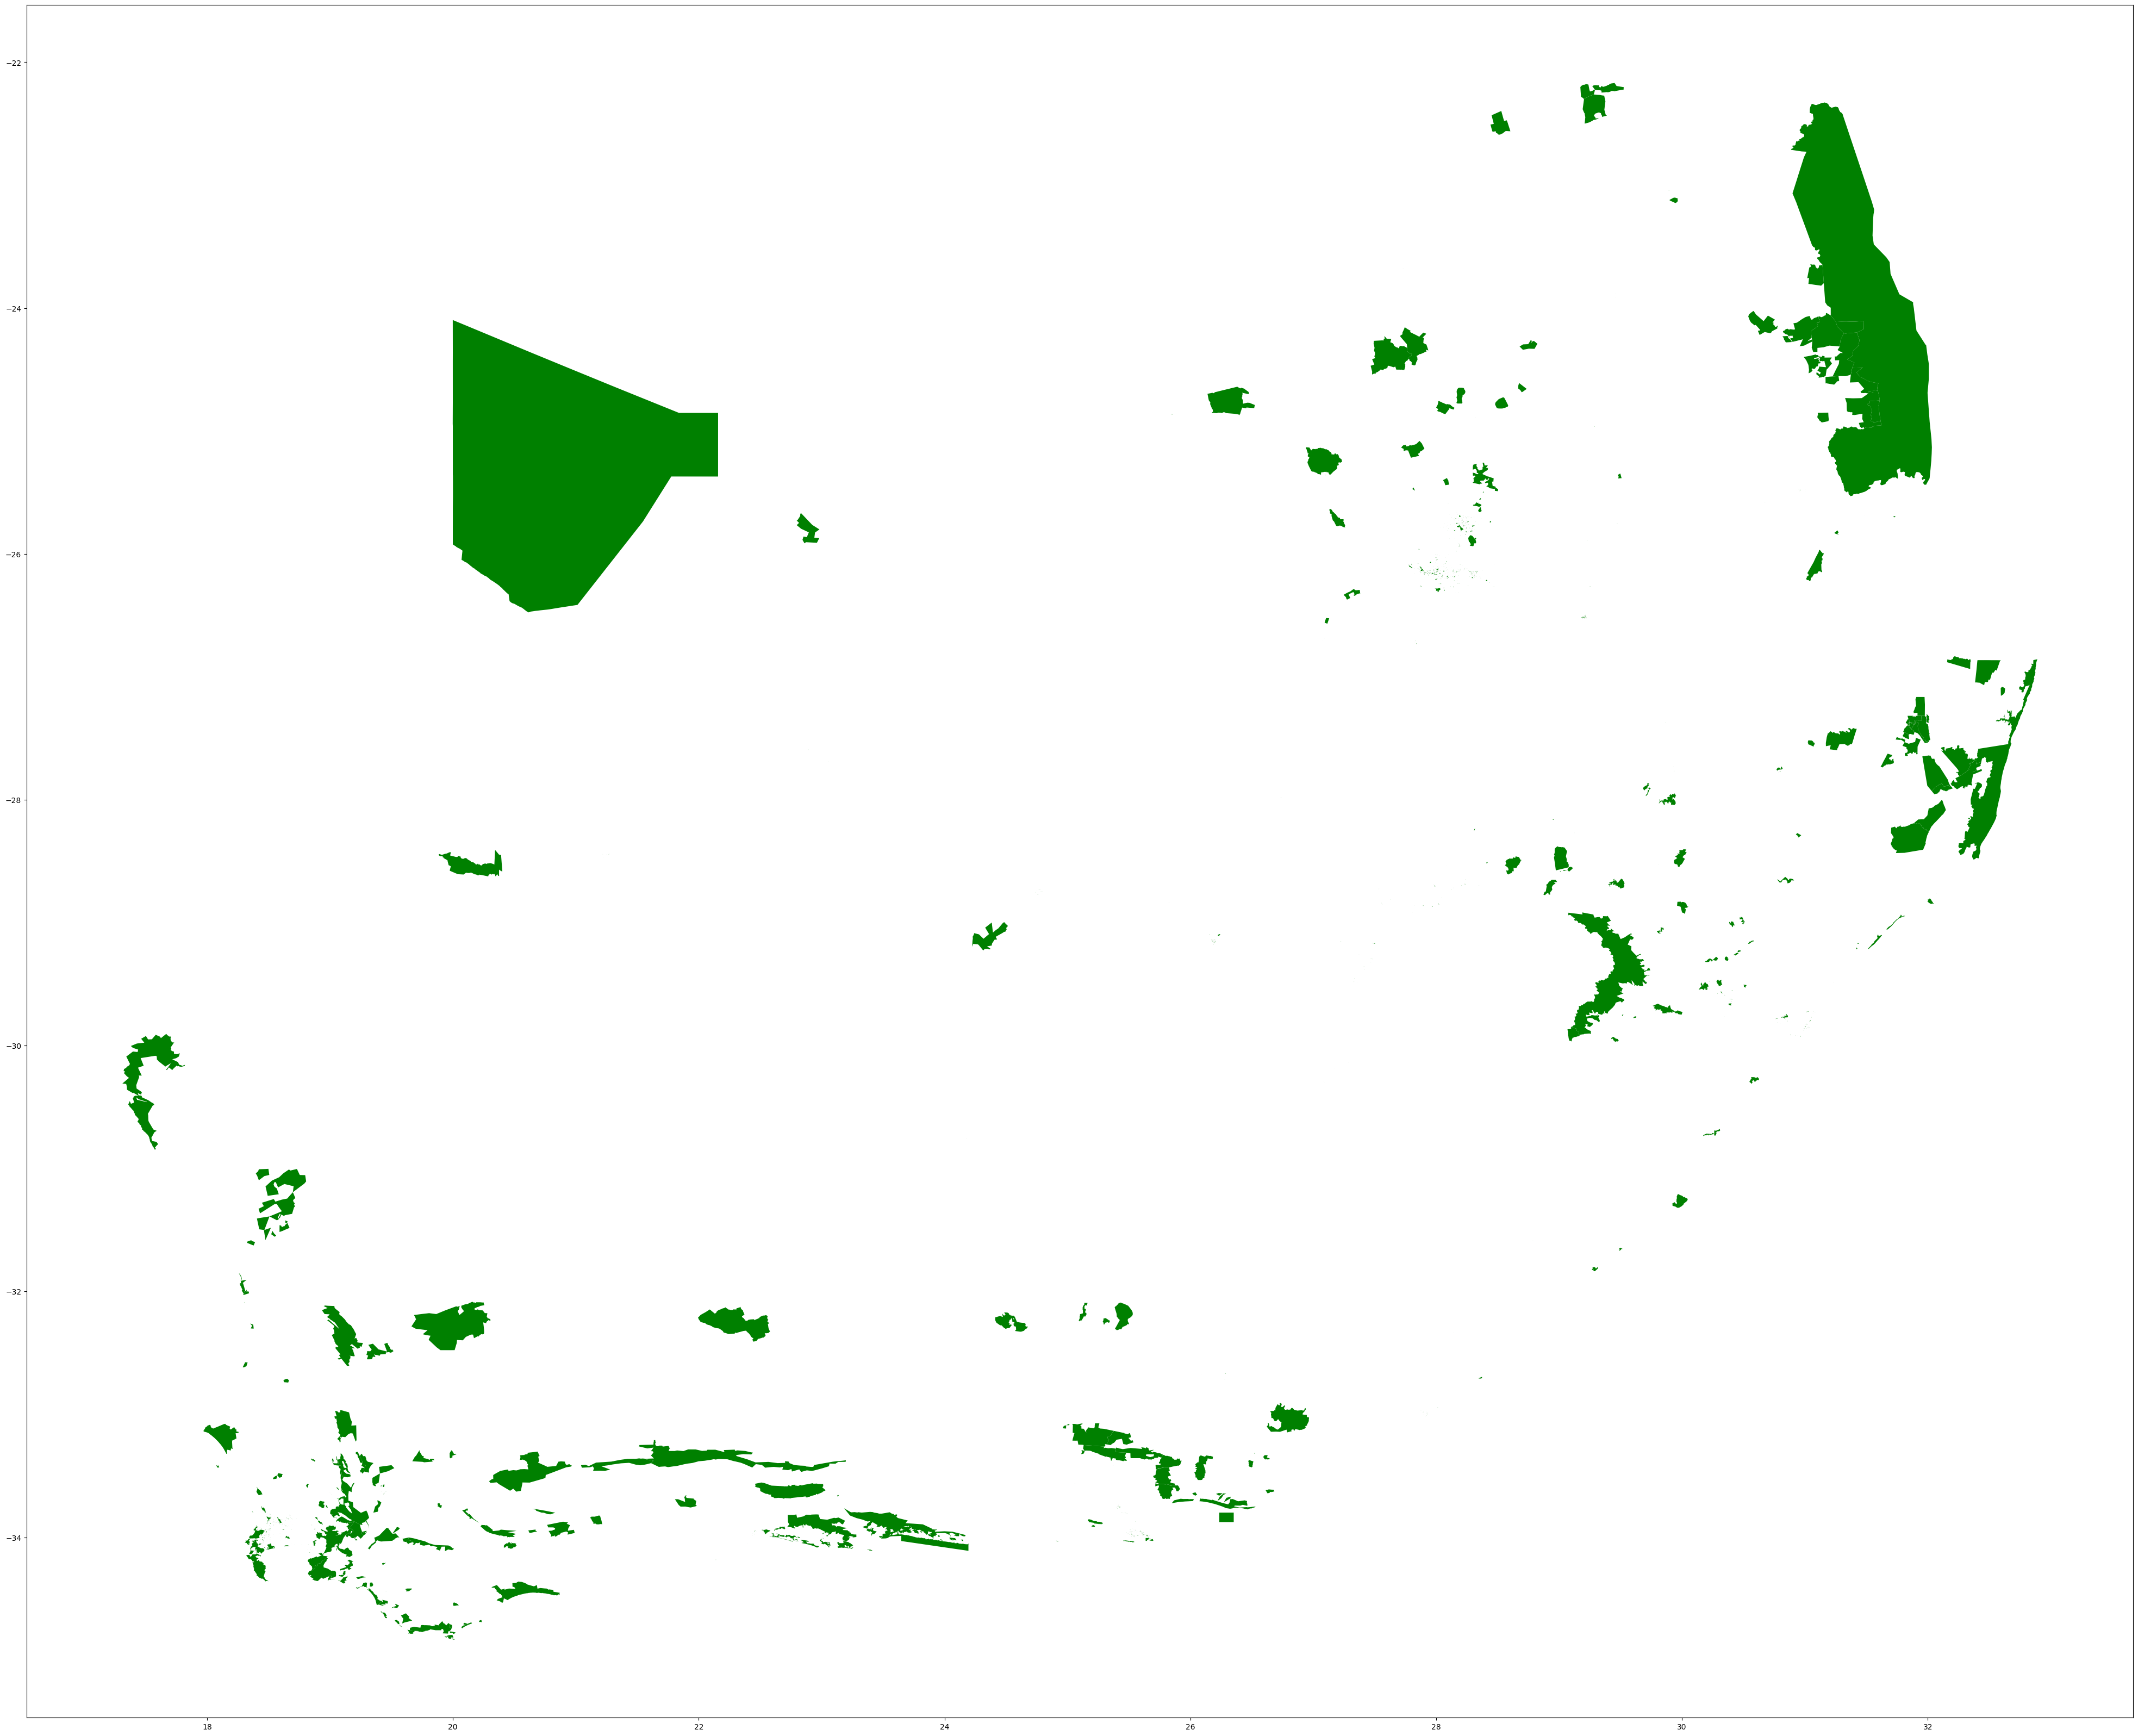

In [ ]:
# values for 'leisure' include 'park' and 'nature_reserve'
condition = gdf['leisure'].isin(['park', 'nature_reserve'])
gdf[condition].plot(figsize=(50,50), color="green")

In [ ]:
shape_path ="/content/drive/MyDrive/OSM/shapefile/ZAGE71FL/ZAGE71FL.shp"

In [ ]:
sa_dhs = gpd.read_file(shape_path)

In [ ]:
sa_dhs.shape

(746, 21)

In [ ]:
sa_dhs.tail()

DHSID DHSCC  DHSYEAR  DHSCLUST CCFIPS ADM1FIPS ADM1FIPSNA  \
741  ZA201700000746    ZA   2017.0     746.0     SF     NULL       NULL   
742  ZA201700000747    ZA   2017.0     747.0     SF     NULL       NULL   
743  ZA201700000748    ZA   2017.0     748.0     SF     NULL       NULL   
744  ZA201700000749    ZA   2017.0     749.0     SF     NULL       NULL   
745  ZA201700000750    ZA   2017.0     750.0     SF     NULL       NULL   

    ADM1SALBNA ADM1SALBCO  ADM1DHS  ... DHSREGCO      DHSREGNA SOURCE  \
741       NULL       NULL      9.0  ...      9.0       Limpopo    GPS   
742       NULL       NULL      2.0  ...      2.0  Eastern Cape    GPS   
743       NULL       NULL      1.0  ...      1.0  Western Cape    GPS   
744       NULL       NULL      6.0  ...      6.0    North West    GPS   
745       NULL       NULL      8.0  ...      8.0    Mpumalanga    GPS   

    URBAN_RURA     LATNUM    LONGNUM  ALT_GPS  ALT_DEM  DATUM  \
741          R -23.585160  29.274971   9999.0   1161.0  WGS84   
742          R -32.366735  28.398312   9999.0    414.0  WGS84   
743          U -33.828074  18.683436   9999.0    110.0  WGS84   
744          R -25.369296  27.127576   9999.0   1049.0  WGS84   
745          R -25.743748  31.629938   9999.0    340.0  WGS84   

                       geometry  
741  POINT (29.27497 -23.58516)  
742  POINT (28.39831 -32.36673)  
743  POINT (18.68344 -33.82807)  
744  POINT (27.12758 -25.36930)  
745  POINT (31.62994 -25.74375)  

[5 rows x 21 columns]

In [ ]:
select_columns = ['DHSCLUST', 'URBAN_RURA', 'LATNUM', 'LONGNUM','geometry']
clust_data = sa_dhs[select_columns]
clust_data

DHSCLUST URBAN_RURA     LATNUM    LONGNUM                    geometry
0         1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)
1         2.0          R -29.193314  31.515238  POINT (31.51524 -29.19331)
2         3.0          U -26.861839  27.906485  POINT (27.90648 -26.86184)
3         4.0          R -26.292138  30.167005  POINT (30.16700 -26.29214)
4         5.0          R -29.588435  29.813278  POINT (29.81328 -29.58844)
..        ...        ...        ...        ...                         ...
741     746.0          R -23.585160  29.274971  POINT (29.27497 -23.58516)
742     747.0          R -32.366735  28.398312  POINT (28.39831 -32.36673)
743     748.0          U -33.828074  18.683436  POINT (18.68344 -33.82807)
744     749.0          R -25.369296  27.127576  POINT (27.12758 -25.36930)
745     750.0          R -25.743748  31.629938  POINT (31.62994 -25.74375)

[746 rows x 5 columns]

In [ ]:
sa_dhs.columns

Index(['DHSID', 'DHSCC', 'DHSYEAR', 'DHSCLUST', 'CCFIPS', 'ADM1FIPS',
       'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME',
       'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM', 'LONGNUM',
       'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'],
      dtype='object')

In [ ]:
sa_dhs.DHSREGNA.unique()

array(['Gauteng', 'KwaZulu-Natal', 'Free State', 'Mpumalanga',
       'Eastern Cape', 'North West', 'Western Cape', 'Northern Cape',
       'Limpopo'], dtype=object)

In [ ]:
#checking the metadata
type(sa_dhs)

geopandas.geodataframe.GeoDataFrame

In [ ]:
sa_dhs.total_bounds

array([ 16.482362, -34.463232,  32.299009, -22.332898])

In [ ]:
sa_dhs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
sa_dhs.geometry.head()

0    POINT (27.38737 -26.40095)
1    POINT (31.51524 -29.19331)
2    POINT (27.90648 -26.86184)
3    POINT (30.16700 -26.29214)
4    POINT (29.81328 -29.58844)
Name: geometry, dtype: geometry

<Axes: >

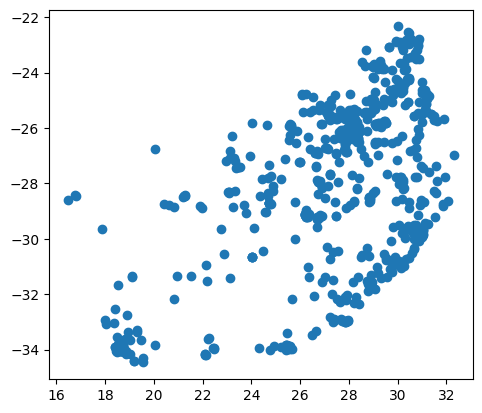

In [ ]:
sa_dhs.loc[:, 'geometry'].plot()

In [ ]:
#reading the rest of the data downloaded from DHS to make sense of it
adult_health = pd.read_stata("/content/drive/MyDrive/OSM/the_rest/ZAAH71DT/ZAAHM71FL.DTA")
print(adult_health)

              mcaseid mv000  mv001  mv002  mv003  mv004    mv005  mv006  \
0            1  11  1   ZA7      1     11      1      1  1344070      8   
1            1  19  1   ZA7      1     19      1      1        0      8   
2            1  27  1   ZA7      1     27      1      1  1344070     10   
3            1  28  1   ZA7      1     28      1      1  1344070      8   
4            2  29  4   ZA7      2     29      4      2  1147470      9   
...               ...   ...    ...    ...    ...    ...      ...    ...   
4205       750  65  1   ZA7    750     65      1    750   549760      8   
4206       750  72  1   ZA7    750     72      1    750   549760      8   
4207       750  84  1   ZA7    750     84      1    750   549760      8   
4208       750  86  2   ZA7    750     86      2    750   549760      8   
4209       750  86  3   ZA7    750     86      3    750   549760      8   

      mv007  mv008  ...  sm1153a  sm1153b  sm1153c  sm1153d  sm1153e sm1153f  \
0      2016   1400 

In [ ]:
adult_health.columns

Index(['mcaseid', 'mv000', 'mv001', 'mv002', 'mv003', 'mv004', 'mv005',
       'mv006', 'mv007', 'mv008',
       ...
       'sm1153a', 'sm1153b', 'sm1153c', 'sm1153d', 'sm1153e', 'sm1153f',
       'sm1153g', 'sm1153h', 'sm1153x', 'sm1154'],
      dtype='object', length=248)

In [ ]:
adult_health_meta =  pd.read_stata("/content/drive/MyDrive/OSM/the_rest/ZAAH71DT/ZAAHM71FL.DTA", iterator = True)
adult_dictionary = adult_health_meta.variable_labels()
adult_dictionary

{'mcaseid': 'case identification',
 'mv000': 'country code and phase',
 'mv001': 'cluster number',
 'mv002': 'household number',
 'mv003': "respondent's line number",
 'mv004': 'ultimate area unit',
 'mv005': "men's sample weight (6 decimals)",
 'mv006': 'month of interview',
 'mv007': 'year of interview',
 'mv008': 'date of interview (cmc)',
 'mv008a': 'date of interview century day code (cdc)',
 'mv009': 'month of birth',
 'mv010': 'year of birth',
 'mv011': 'date of birth (cmc)',
 'mv012': 'current age',
 'mv013': 'age in 5-year groups',
 'mv014': 'completeness of age information',
 'mv015': 'result of interview',
 'mv016': 'day of interview',
 'mv021': 'primary sampling unit',
 'mv022': 'sample stratum number',
 'mv023': 'sample domain',
 'mv024': 'region',
 'mv025': 'type of place of residence',
 'mv026': 'na - de facto place of residence',
 'mv027': 'number of visits',
 'mv028': 'interviewer identification',
 'mv029': 'na - keyer identification',
 'mv030': 'field supervisor',
 'm

In [ ]:
variable_names = list(adult_dictionary.keys())
print(variable_names)

['mcaseid', 'mv000', 'mv001', 'mv002', 'mv003', 'mv004', 'mv005', 'mv006', 'mv007', 'mv008', 'mv008a', 'mv009', 'mv010', 'mv011', 'mv012', 'mv013', 'mv014', 'mv015', 'mv016', 'mv021', 'mv022', 'mv023', 'mv024', 'mv025', 'mv026', 'mv027', 'mv028', 'mv029', 'mv030', 'mv031', 'mv032', 'mv034_1', 'mv034_2', 'mv034_3', 'mv034_4', 'mv034_5', 'mv034_6', 'mv034_7', 'mv034_8', 'mv034a_1', 'mv034a_2', 'mv034a_3', 'mv034a_4', 'mv034a_5', 'mv034a_6', 'mv034a_7', 'mv034a_8', 'mv034b_1', 'mv034b_2', 'mv034b_3', 'mv034b_4', 'mv034b_5', 'mv034b_6', 'mv034b_7', 'mv034b_8', 'mv035', 'mv045a', 'mv045b', 'mv045c', 'mv046', 'mv801', 'mv802', 'mv803', 'mv101', 'mv102', 'mv103', 'mv104', 'mv105', 'mv105a', 'mv106', 'mv107', 'mv130', 'mv131', 'mv133', 'mv134', 'mv135', 'mv136', 'mv138', 'mv149', 'mv150', 'mv151', 'mv152', 'mv155', 'mv156', 'mv157', 'mv158', 'mv159', 'mv167', 'mv168', 'mv169a', 'mv169b', 'mv170', 'mv171a', 'mv171b', 'mv190', 'mv191', 'mv190a', 'mv191a', 'mv501', 'mv502', 'mv714', 'mv716', 'mv7

In [ ]:
new_var_names = list(adult_health_meta.variable_labels().values())
print(new_var_names)

['case identification', 'country code and phase', 'cluster number', 'household number', "respondent's line number", 'ultimate area unit', "men's sample weight (6 decimals)", 'month of interview', 'year of interview', 'date of interview (cmc)', 'date of interview century day code (cdc)', 'month of birth', 'year of birth', 'date of birth (cmc)', 'current age', 'age in 5-year groups', 'completeness of age information', 'result of interview', 'day of interview', 'primary sampling unit', 'sample stratum number', 'sample domain', 'region', 'type of place of residence', 'na - de facto place of residence', 'number of visits', 'interviewer identification', 'na - keyer identification', 'field supervisor', 'na - field editor', 'na - office editor', 'line number of wife/partner', 'line number of wife/partner', 'line number of wife/partner', 'line number of wife/partner', 'line number of wife/partner', 'line number of wife/partner', 'line number of wife/partner', 'line number of wife/partner', 'na 

In [ ]:
def replace_variable_labels(data, data_meta):
    new_var_names = list(data_meta.variable_labels().values())
    for new_var_name, variable_name in zip(new_var_names, data.columns):
        if variable_name in data_meta.value_labels():
            data[new_var_name] = data[variable_name].replace(data_meta.value_labels()[variable_name])
    data.columns = new_var_names
    return data



In [ ]:
adult_health_data = replace_variable_labels(adult_health, adult_health_meta)

print(adult_health_data)

     case identification country code and phase  cluster number  \
0               1  11  1                    ZA7               1   
1               1  19  1                    ZA7               1   
2               1  27  1                    ZA7               1   
3               1  28  1                    ZA7               1   
4               2  29  4                    ZA7               2   
...                  ...                    ...             ...   
4205          750  65  1                    ZA7             750   
4206          750  72  1                    ZA7             750   
4207          750  84  1                    ZA7             750   
4208          750  86  2                    ZA7             750   
4209          750  86  3                    ZA7             750   

      household number  respondent's line number  ultimate area unit  \
0                   11                         1                   1   
1                   19                         1   

In [ ]:
adult_health_data.columns

Index(['case identification', 'country code and phase', 'cluster number',
       'household number', 'respondent's line number', 'ultimate area unit',
       'men's sample weight (6 decimals)', 'month of interview',
       'year of interview', 'date of interview (cmc)',
       ...
       'medications with codeine used in last 12 months: broncleer/lenazine forte',
       'medications with codeine used in last 12 months: actifed dry cough',
       'medications with codeine used in last 12 months: benylin syrup with codeine',
       'medications with codeine used in last 12 months: lenadol/adco-dol tablets',
       'medications with codeine used in last 12 months: nurofen plus',
       'medications with codeine used in last 12 months: myprodol',
       'medications with codeine used in last 12 months: stilpane',
       'medications with codeine used in last 12 months: syndol',
       'medications with codeine used in last 12 months: other',
       'last 12 months received treatment for us

The code above shows how to handle the DHS data if at all there are any parameters to be derived


In [ ]:
household_rec_data =  pd.read_stata("/content/drive/MyDrive/OSM/the_rest/ZAHR71DT/ZAHR71FL.DTA")
household_rec_data.head()

hhid hv000  hv001  hv002 hv003  hv004    hv005  hv006  hv007  \
0         1  11   ZA7      1     11     1      1  1269316      8   2016   
1         1  13   ZA7      1     13     2      1  1269316      8   2016   
2         1  19   ZA7      1     19     1      1  1269316      8   2016   
3         1  27   ZA7      1     27     1      1  1269316     10   2016   
4         1  28   ZA7      1     28     2      1  1269316      8   2016   

   hv008  ...  shmhba1c_15  shmhba1c_16  shmhba1c_17  shmhba1c_18  \
0   1400  ...          NaN          NaN          NaN          NaN   
1   1400  ...          NaN          NaN          NaN          NaN   
2   1400  ...          NaN          NaN          NaN          NaN   
3   1402  ...          NaN          NaN          NaN          NaN   
4   1400  ...          NaN          NaN          NaN          NaN   

   shmhba1c_19  shmhba1c_20  shmhba1c_21 shmhba1c_22  shmhba1c_23  shmhba1c_24  
0          NaN          NaN          NaN         NaN          NaN          NaN  
1          NaN          NaN          NaN         NaN          NaN          NaN  
2          NaN          NaN          NaN         NaN          NaN          NaN  
3          NaN          NaN          NaN         NaN          NaN          NaN  
4          NaN          NaN          NaN         NaN          NaN          NaN  

[5 rows x 6148 columns]

In [ ]:
household_rec_meta =  pd.read_stata("/content/drive/MyDrive/OSM/the_rest/ZAHR71DT/ZAHR71FL.DTA", iterator = True)
household_dict = household_rec_meta.variable_labels()
household_dict

{'hhid': 'case identification',
 'hv000': 'country code and phase',
 'hv001': 'cluster number',
 'hv002': 'household number',
 'hv003': "respondent's line number (answering household questionnaire)",
 'hv004': 'ultimate area unit',
 'hv005': 'household sample weight (6 decimals)',
 'hv006': 'month of interview',
 'hv007': 'year of interview',
 'hv008': 'date of interview (cmc)',
 'hv008a': 'date of interview century day code (cdc)',
 'hv009': 'number of household members',
 'hv010': 'number of eligible women in household',
 'hv011': 'number of eligible men in household',
 'hv012': 'number of de jure members',
 'hv013': 'number of de facto members',
 'hv014': 'number of children 5 and under (de jure)',
 'hv015': 'result of household interview',
 'hv016': 'day of interview',
 'hv017': 'number of visits',
 'hv018': 'interviewer identification',
 'hv019': 'na - keyer identification',
 'hv020': 'ever-married sample',
 'hv021': 'primary sampling unit',
 'hv022': 'sample strata for sampling e

The components we might need at this point are:  'hv270': 'wealth index combined',
 'hv271': 'wealth index factor score combined (5 decimals)',
 'hv270a': 'wealth index for urban/rural',
 'hv271a': 'wealth index factor score for urban/rural (5 decimals)',

In [ ]:
#replacement with aliases
h_variable_names = list(household_dict.keys())
h_new_var_names = list(household_rec_meta.variable_labels().values())

In [ ]:
household_rec = replace_variable_labels(household_rec_data, household_rec_meta)

print(household_rec)

      case identification country code and phase  cluster number  \
0                   1  11                    ZA7               1   
1                   1  13                    ZA7               1   
2                   1  19                    ZA7               1   
3                   1  27                    ZA7               1   
4                   1  28                    ZA7               1   
...                   ...                    ...             ...   
11078             750  80                    ZA7             750   
11079             750  81                    ZA7             750   
11080             750  82                    ZA7             750   
11081             750  84                    ZA7             750   
11082             750  86                    ZA7             750   

       household number  \
0                    11   
1                    13   
2                    19   
3                    27   
4                    28   
...                 .

In [ ]:
type(household_rec)

pandas.core.frame.DataFrame

In [ ]:
household_rec.columns

Index(['case identification', 'country code and phase', 'cluster number',
       'household number',
       'respondent's line number (answering household questionnaire)',
       'ultimate area unit', 'household sample weight (6 decimals)',
       'month of interview', 'year of interview', 'date of interview (cmc)',
       ...
       'final result hba1c for men (3 decimals implicit)',
       'final result hba1c for men (3 decimals implicit)',
       'final result hba1c for men (3 decimals implicit)',
       'final result hba1c for men (3 decimals implicit)',
       'final result hba1c for men (3 decimals implicit)',
       'final result hba1c for men (3 decimals implicit)',
       'final result hba1c for men (3 decimals implicit)',
       'final result hba1c for men (3 decimals implicit)',
       'final result hba1c for men (3 decimals implicit)',
       'final result hba1c for men (3 decimals implicit)'],
      dtype='object', length=6148)

In [ ]:
selected_columns = household_rec.filter(like='wealth index').join(
    household_rec.filter(like='cluster')
)
print(selected_columns)

      wealth index combined  wealth index factor score combined (5 decimals)  \
0                    middle                                            42068   
1                    poorer                                           -30340   
2                    middle                                            38936   
3                    richer                                            64254   
4                   richest                                           132058   
...                     ...                                              ...   
11078                poorer                                           -73794   
11079                poorer                                           -47842   
11080                middle                                              396   
11081                poorer                                           -52279   
11082                middle                                             2345   

      wealth index for urban/rural  \
0

In [ ]:
selected_columns.rename(columns={'cluster number': 'DHSCLUST'}, inplace=True)


In [ ]:
selected_columns

wealth index combined  wealth index factor score combined (5 decimals)  \
0                    middle                                            42068   
1                    poorer                                           -30340   
2                    middle                                            38936   
3                    richer                                            64254   
4                   richest                                           132058   
...                     ...                                              ...   
11078                poorer                                           -73794   
11079                poorer                                           -47842   
11080                middle                                              396   
11081                poorer                                           -52279   
11082                middle                                             2345   

      wealth index for urban/rural  \
0                           poorer   
1                          poorest   
2                           poorer   
3                           middle   
4                          richest   
...                            ...   
11078                       middle   
11079                       middle   
11080                      richest   
11081                       middle   
11082                      richest   

       wealth index factor score for urban/rural (5 decimals)  DHSCLUST  \
0                                                   1748              1   
1                                                 -77203              1   
2                                                  -1668              1   
3                                                  25938              1   
4                                                  99868              1   
...                                                  ...            ...   
11078                                             -19226            750   
11079                                              13618            750   
11080                                              74666            750   
11081                                               8002            750   
11082                                              77132            750   

       cluster altitude in meters  
0                            1626  
1                            1626  
2                            1626  
3                            1626  
4                            1626  
...                           ...  
11078                         340  
11079                         340  
11080                         340  
11081                         340  
11082                         340  

[11083 rows x 6 columns]

In [ ]:
clust_data['DHSCLUST'].astype(int)

0        1
1        2
2        3
3        4
4        5
      ... 
741    746
742    747
743    748
744    749
745    750
Name: DHSCLUST, Length: 746, dtype: int64

In [ ]:
clusters_df = pd.merge(clust_data, selected_columns, on ='DHSCLUST')

In [ ]:
clusters_df

DHSCLUST URBAN_RURA     LATNUM    LONGNUM                    geometry  \
0           1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)   
1           1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)   
2           1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)   
3           1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)   
4           1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)   
...         ...        ...        ...        ...                         ...   
11078     750.0          R -25.743748  31.629938  POINT (31.62994 -25.74375)   
11079     750.0          R -25.743748  31.629938  POINT (31.62994 -25.74375)   
11080     750.0          R -25.743748  31.629938  POINT (31.62994 -25.74375)   
11081     750.0          R -25.743748  31.629938  POINT (31.62994 -25.74375)   
11082     750.0          R -25.743748  31.629938  POINT (31.62994 -25.74375)   

      wealth index combined  wealth index factor score combined (5 decimals)  \
0                    middle                                            42068   
1                    poorer                                           -30340   
2                    middle                                            38936   
3                    richer                                            64254   
4                   richest                                           132058   
...                     ...                                              ...   
11078                poorer                                           -73794   
11079                poorer                                           -47842   
11080                middle                                              396   
11081                poorer                                           -52279   
11082                middle                                             2345   

      wealth index for urban/rural  \
0                           poorer   
1                          poorest   
2                           poorer   
3                           middle   
4                          richest   
...                            ...   
11078                       middle   
11079                       middle   
11080                      richest   
11081                       middle   
11082                      richest   

       wealth index factor score for urban/rural (5 decimals)  \
0                                                   1748        
1                                                 -77203        
2                                                  -1668        
3                                                  25938        
4                                                  99868        
...                                                  ...        
11078                                             -19226        
11079                                              13618        
11080                                              74666        
11081                                               8002        
11082                                              77132        

       cluster altitude in meters  
0                            1626  
1                            1626  
2                            1626  
3                            1626  
4                            1626  
...                           ...  
11078                         340  
11079                         340  
11080                         340  
11081                         340  
11082                         340  

[11083 rows x 10 columns]

In [ ]:
clusters_df.to_csv('clusters.csv', index = False, header = True, sep = ',', na_rep = 'NA')

In [ ]:
#division of clusters into urban and rural
clusters_rural = clusters_df[clusters_df['URBAN_RURA']=='R']
clusters_urban = clusters_df[clusters_df['URBAN_RURA']=='U']
clusters_rural.head()


DHSCLUST URBAN_RURA     LATNUM    LONGNUM                    geometry  \
14       2.0          R -29.193314  31.515238  POINT (31.51524 -29.19331)   
15       2.0          R -29.193314  31.515238  POINT (31.51524 -29.19331)   
16       2.0          R -29.193314  31.515238  POINT (31.51524 -29.19331)   
17       2.0          R -29.193314  31.515238  POINT (31.51524 -29.19331)   
18       2.0          R -29.193314  31.515238  POINT (31.51524 -29.19331)   

   wealth index combined  wealth index factor score combined (5 decimals)  \
14                poorer                                           -57050   
15               poorest                                          -125921   
16                middle                                             2608   
17                poorer                                           -17777   
18               poorest                                          -152908   

   wealth index for urban/rural  \
14                       middle   
15                       poorer   
16                      richest   
17                       richer   
18                      poorest   

    wealth index factor score for urban/rural (5 decimals)  \
14                                               1965        
15                                             -85194        
16                                              77465        
17                                              51666        
18                                            -119348        

    cluster altitude in meters  
14                          45  
15                          45  
16                          45  
17                          45  
18                          45

In [ ]:
clusters_urban.head()

DHSCLUST URBAN_RURA     LATNUM    LONGNUM                    geometry  \
0       1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)   
1       1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)   
2       1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)   
3       1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)   
4       1.0          U -26.400954  27.387368  POINT (27.38737 -26.40095)   

  wealth index combined  wealth index factor score combined (5 decimals)  \
0                middle                                            42068   
1                poorer                                           -30340   
2                middle                                            38936   
3                richer                                            64254   
4               richest                                           132058   

  wealth index for urban/rural  \
0                       poorer   
1                      poorest   
2                       poorer   
3                       middle   
4                      richest   

   wealth index factor score for urban/rural (5 decimals)  \
0                                               1748        
1                                             -77203        
2                                              -1668        
3                                              25938        
4                                              99868        

   cluster altitude in meters  
0                        1626  
1                        1626  
2                        1626  
3                        1626  
4                        1626

In [ ]:
#conversion of rural clusters to buffers with 5Km radius
clusters_rural.crs = {'init' :'epsg:4326'}
clusters_rural= clusters_rural.to_crs(epsg=3174)
buffer_length_in_meters = (5 * 1000)

rural_buffer = clusters_rural.geometry.buffer(buffer_length_in_meters)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
len(rural_buffer)

4527

In [ ]:
#convert Urban clusters to buffers with 2km radius
clusters_urban.crs = {'init' :'epsg:4326'}
clusters_urban= clusters_urban.to_crs(epsg=3174)
buffer_length = (2 * 1000)

urban_buffer = clusters_urban.geometry.buffer(buffer_length)

In [ ]:
len(urban_buffer)

6556

# Sample peprocesssing of the OSM data

In [ ]:
complete_df

ogc_fid                                       WKT_GEOMETRY   osm_id  \
0              1  LINESTRING (25.5575495 -33.9511095,25.5606572 ...  3715718   
1              2  LINESTRING (25.5759438 -33.9485949,25.5761168 ...  3715888   
2              3  LINESTRING (25.5577951 -33.9502452,25.5595087 ...  3823543   
3              4  LINESTRING (25.5568513 -33.9534452,25.5567884 ...  3823545   
4              5  LINESTRING (25.5596765 -33.9541297,25.5597392 ...  3823547   
...          ...                                                ...      ...   
1288044     6001  GEOMETRYCOLLECTION (LINESTRING (30.499611 -29....  6813367   
1288045     6002  GEOMETRYCOLLECTION (LINESTRING (30.4995768 -29...  6813368   
1288046     6003  GEOMETRYCOLLECTION (LINESTRING (30.4990703 -29...  6813369   
1288047     6004  GEOMETRYCOLLECTION (LINESTRING (30.4998112 -29...  6813370   
1288048     6005  GEOMETRYCOLLECTION (POINT (20.0583872 -32.4067...  6839197   

                  name      highway waterway aerialway barrier man_made  \
0         Lucas Street  residential     None      None    None     None   
1            Ring Road  residential     None      None    None     None   
2        Hudson Street  residential     None      None    None     None   
3           6th Avenue  residential     None      None    None     None   
4           5th Avenue  residential     None      None    None     None   
...                ...          ...      ...       ...     ...      ...   
1288044           None          NaN      NaN       NaN     NaN      NaN   
1288045           None          NaN      NaN       NaN     NaN      NaN   
1288046           None          NaN      NaN       NaN     NaN      NaN   
1288047           None          NaN      NaN       NaN     NaN      NaN   
1288048           None          NaN      NaN       NaN     NaN      NaN   

         z_order  ... land_area landuse leisure military natural office shop  \
0            3.0  ...       NaN     NaN     NaN      NaN     NaN    NaN  NaN   
1            3.0  ...       NaN     NaN     NaN      NaN     NaN    NaN  NaN   
2            3.0  ...       NaN     NaN     NaN      NaN     NaN    NaN  NaN   
3            3.0  ...       NaN     NaN     NaN      NaN     NaN    NaN  NaN   
4            3.0  ...       NaN     NaN     NaN      NaN     NaN    NaN  NaN   
...          ...  ...       ...     ...     ...      ...     ...    ...  ...   
1288044      NaN  ...       NaN     NaN     NaN      NaN     NaN    NaN  NaN   
1288045      NaN  ...       NaN     NaN     NaN      NaN     NaN    NaN  NaN   
1288046      NaN  ...       NaN     NaN     NaN      NaN     NaN    NaN  NaN   
1288047      NaN  ...       NaN     NaN     NaN      NaN     NaN    NaN  NaN   
1288048      NaN  ...       NaN     NaN     NaN      NaN     NaN    NaN  NaN   

        sport tourism                                               geom  
0         NaN     NaN  LINESTRING (25.55755 -33.95111, 25.56066 -33.9...  
1         NaN     NaN  LINESTRING (25.57594 -33.94859, 25.57612 -33.9...  
2         NaN     NaN  LINESTRING (25.55780 -33.95025, 25.55951 -33.9...  
3         NaN     NaN  LINESTRING (25.55685 -33.95345, 25.55679 -33.9...  
4         NaN     NaN  LINESTRING (25.55968 -33.95413, 25.55974 -33.9...  
...       ...     ...                                                ...  
1288044   NaN     NaN  GEOMETRYCOLLECTION (LINESTRING (30.49961 -29.7...  
1288045   NaN     NaN  GEOMETRYCOLLECTION (LINESTRING (30.49958 -29.7...  
1288046   NaN     NaN  GEOMETRYCOLLECTION (LINESTRING (30.49907 -29.7...  
1288047   NaN     NaN  GEOMETRYCOLLECTION (LINESTRING (30.49981 -29.7...  
1288048   NaN     NaN    GEOMETRYCOLLECTION (POINT (20.05839 -32.40670))  

[1288049 rows x 36 columns]

trial and error

In [ ]:
! pip install pyrosm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyrobuf-0.9.3-cp310-cp310-linux_x86_64.whl
  Created wheel for pyrosm: filename=pyrosm-0.6.2-cp310-cp310-linux_x86_64.whl size=7462044 sha256=3575c82e66bf38dea6bac144ee583c11078dc01f895a98624015c55e2a02ce60
  Stored in directory: /root/.cache/pip/wheels/18/21/22/b07b96a708420e351c553188667cfd6ebc7e78a011a8708cf4
^C


In [ ]:
#extraction of drivable roads from pbf file
from pyrosm import OSM
import pyrosm

fp = "/content/drive/MyDrive/OSM/south-africa-170101.osm.pbf"
osm = pyrosm.OSM(fp)

ModuleNotFoundError: ignored

Pyrosm makes it easy to filter street networks using the get_network() method. You can parse streets separately for different travel modes by specifying the type of network using network_type -parameter. The allowed network types are:

    walking (default)

    cycling

    driving

    driving+service (includes also public service vehicles)
